# Auxiliary

In [37]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
import project
from project.utils import *

In [39]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Models

In [40]:
from project.models.box import Box
from project.models.lj import LJFluid
from project.models.chain import GaussianChain
from project.models.ising import IsingModel
from project.models.nematic import NematicLattice

## LJ Fluid

In [42]:
lj = LJFluid(dim = 2, L = 15)
x = lj.init_coords(100, init_try = 5000)

In [44]:
%time lj.energy(x)

CPU times: user 956 µs, sys: 366 µs, total: 1.32 ms
Wall time: 894 µs


116.10135349148607

In [45]:
%time lj.energy_idx(x, 10)

CPU times: user 207 µs, sys: 10 µs, total: 217 µs
Wall time: 212 µs


15.827522925731841

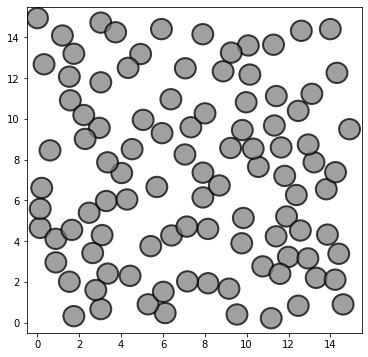

In [18]:
lj.draw_config(x)

In [8]:
idx, new = lj.step(x)

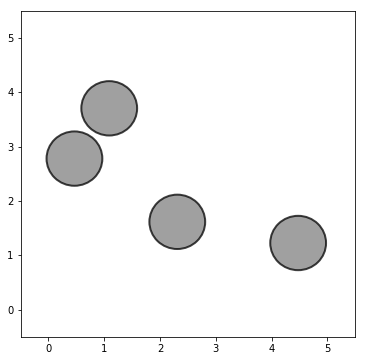

In [9]:
lj.draw_config(new)

## Gaussian Chain

In [46]:
chain = GaussianChain(r0 = 1.5, k = 10.0, L = 25)

In [47]:
N = 500
x = chain.init_coords(N)

In [48]:
%time chain.energy(x)

CPU times: user 25.8 ms, sys: 5.77 ms, total: 31.5 ms
Wall time: 30.7 ms


-244.4324319957521

In [191]:
%time chain.energy_idx(x, 10)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 265 µs


0.7626470020494117

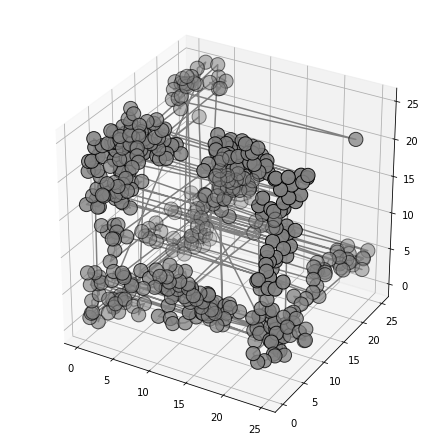

In [192]:
chain.draw_config(x)

In [211]:
%time chain.oprm(x)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 3.08 ms


366.93433521393814

In [196]:
(x.T[:,:,None]*x.T[:,None]).shape

(3, 500, 500)

In [224]:
x[:,:,None]

array([[[12.5       ],
        [12.5       ],
        [12.5       ]],

       [[11.12624675],
        [13.07126604],
        [12.69093747]],

       [[ 9.72770928],
        [13.57071723],
        [12.90222273]],

       ...,

       [[ 4.8758566 ],
        [23.39579554],
        [11.36373227]],

       [[ 4.60498634],
        [24.42316237],
        [12.42257443]],

       [[ 3.82984987],
        [ 0.5706449 ],
        [12.99915684]]])

## Ising Model

In [53]:
ising = IsingModel(h = 1.0)

x = ising.init_coords(50)

In [62]:
x

array([[-1,  1, -1, ...,  1,  1, -1],
       [-1,  1, -1, ..., -1, -1, -1],
       [ 1, -1, -1, ...,  1,  1,  1],
       ...,
       [-1, -1, -1, ...,  1, -1,  1],
       [ 1, -1,  1, ...,  1,  1, -1],
       [ 1,  1,  1, ..., -1,  1, -1]])

In [54]:
%time ising.energy(x)

CPU times: user 300 µs, sys: 154 µs, total: 454 µs
Wall time: 338 µs


-12.0

In [55]:
%time ising.energy_idx(x, 0)

CPU times: user 82 µs, sys: 8 µs, total: 90 µs
Wall time: 85.1 µs


1.0

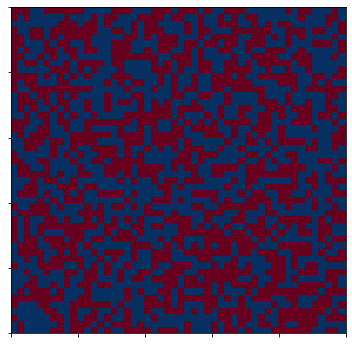

In [56]:
ising.draw_config(x)

In [19]:
ising.oprm(x)

0.125

In [20]:
ising.step(x)

(7, array([[ 1,  1, -1, -1],
        [-1,  1,  1, -1],
        [-1,  1, -1,  1],
        [ 1, -1, -1,  1]]))

## Nematic Lattice 

In [63]:
nem = NematicLattice()

In [67]:
x = nem.init_coords(10)

In [68]:
x.shape

(10, 10, 10, 3)

In [452]:
%time nem.energy(x)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 692 µs


In [453]:
%time nem.energy_idx(x, 10)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 118 µs


-0.5

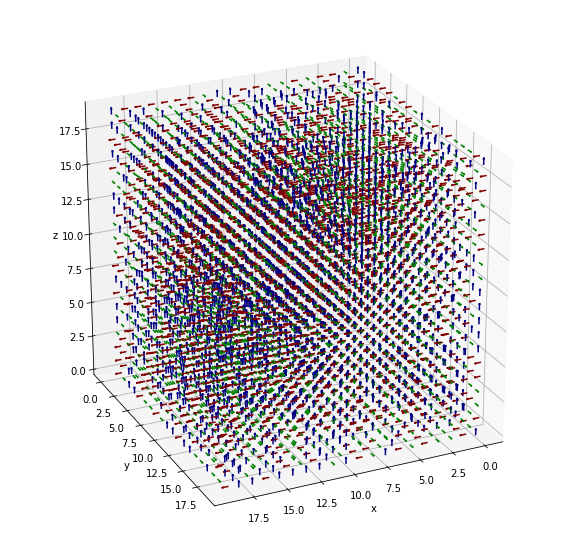

In [454]:
nem.draw_config(x, figsize = (10, 10))

In [25]:
%time idx, new = nem.step(x)

CPU times: user 260 µs, sys: 84 µs, total: 344 µs
Wall time: 273 µs


In [26]:
np.unravel_index(idx, (3, 3, 3))

(2, 0, 0)

In [27]:
x[0,2,1]

array([ 1.,  0.,  0.])

In [28]:
new[0,2,1]

array([ 1.,  0.,  0.])

In [29]:
%time nem.energy_idx(x, idx)

CPU times: user 124 µs, sys: 26 µs, total: 150 µs
Wall time: 137 µs


-1.0

In [30]:
%time nem.energy(new)

CPU times: user 407 µs, sys: 197 µs, total: 604 µs
Wall time: 422 µs


-13.5

# MCMC

In [156]:
from project.models.box import Box
from project.models.lj import LJFluid
from project.models.chain import GaussianChain
from project.models.ising import IsingModel
from project.models.nematic import NematicLattice

## Metropolis

In [163]:
from project.mcmc.metropolis import MetropolisSampler

In [169]:
model = GaussianChain()

x0 = model.init_coords(50)

met = MetropolisSampler(model, x0, temperature = 2.5, stride = 100)

In [170]:
met.run(50000, verbose = 5000)

Step 0 / 50000
Step 5000 / 50000
Step 10000 / 50000
Step 15000 / 50000
Step 20000 / 50000
Step 25000 / 50000
Step 30000 / 50000
Step 35000 / 50000
Step 40000 / 50000
Step 45000 / 50000


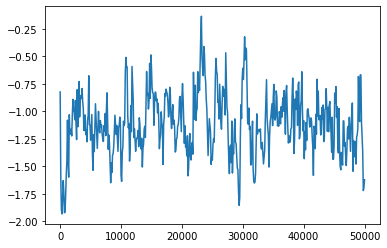

In [171]:
plt.plot(met.steps, met.etraj)

plt.show()

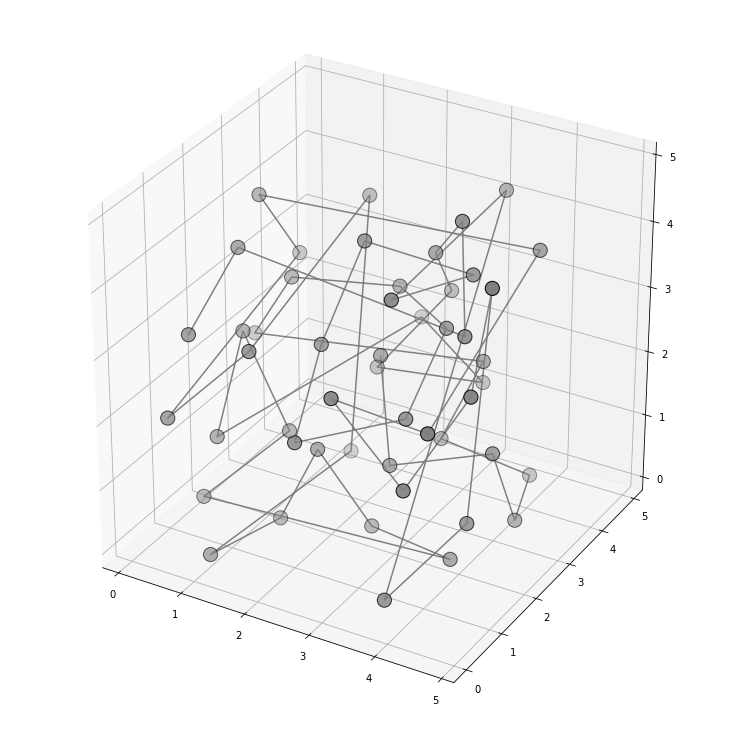

In [172]:
met.model.draw_config(met.traj[0], figsize = (10, 10))

33.023514


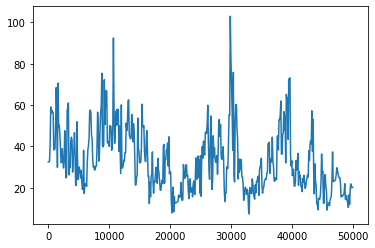

In [174]:
oprm = [model.oprm(c) for c in met.traj]
print(np.mean(oprm))


plt.plot(met.steps, oprm)

plt.show()

## REMC

In [43]:
from project.mcmc.metropolis import ReplicaMetropolisSampler

In [44]:
model = IsingModel(J = 2.5)

x0 = model.init_coords(10)

remc = ReplicaMetropolisSampler(model, x0, temperatures = np.arange(1.0, 5.5, 1.0), stride = 10)

In [45]:
remc.run(5, 5000, verbose = 1000)

In [46]:
remc.etrajs

[array([-0.05, -0.15, -0.4 , ..., -2.5 , -2.5 , -2.5 ]),
 array([-0.05, -0.35, -0.35, ..., -2.4 , -2.4 , -2.5 ]),
 array([-0.05, -0.3 , -0.5 , ..., -1.8 , -1.8 , -1.7 ]),
 array([-0.05, -0.15, -0.3 , ..., -0.8 , -0.85, -0.8 ]),
 array([-0.05, -0.15, -0.1 , ..., -0.45, -0.5 , -0.35])]

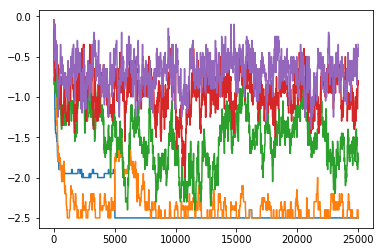

In [47]:
for i in range(len(remc.etrajs)):
    plt.plot(remc.steps, remc.etrajs[i])
    
plt.show()

## Wang Landau

In [48]:
from project.mcmc.metropolis import ReplicaMetropolisSampler